# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.shape

(440, 8)

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [12]:
customers.head(20)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [15]:
# 1. Number of products each customer buys in different supermarkets, or maybe online/onsite + region + products themselves

In [8]:
print(customers.dtypes)
print(customers.shape)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
(440, 8)


In [ ]:
# 2. No categorical

In [20]:
customers.drop("Detergents", axis=0)

KeyError: "['Detergents'] not found in axis"

In [21]:
#  Damn that tiny underscore, it seemed like an empty column

customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
# 3. So no missing values

<Axes: >

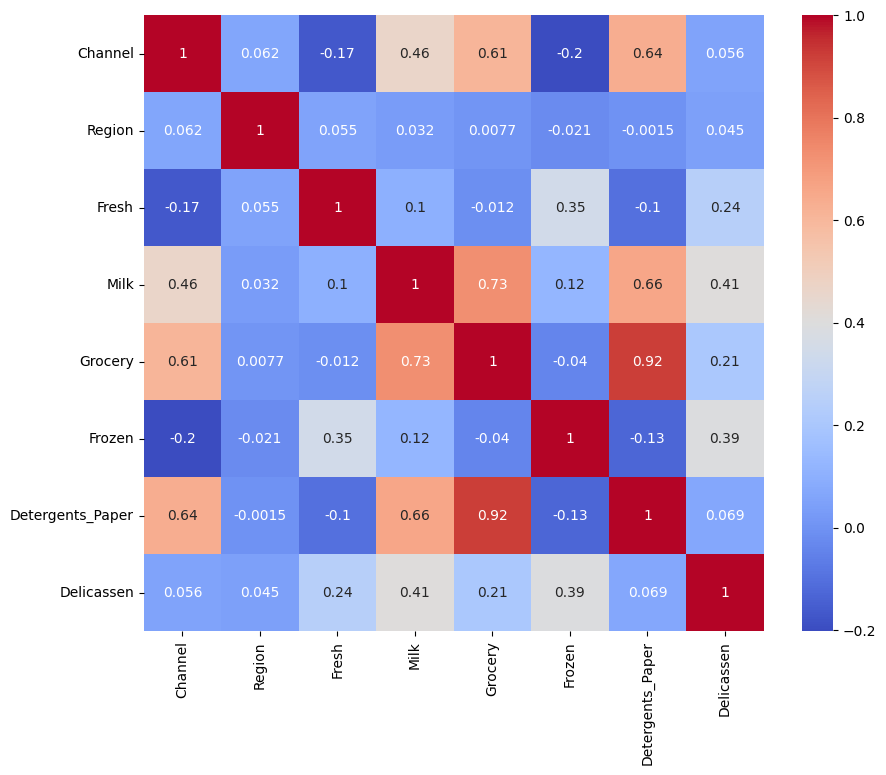

In [24]:
import seaborn as sns

# 4. Column collinearity
correlation_matrix = customers.corr()
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')




In [27]:
# 5. Descriptive statistics and outliers
descriptive_stats = customers.describe()
descriptive_stats



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# From this data description there seems to be a lot of difference between the 3rd quartil and max of fresh, milk, grocery... In all of them, but less in the last two

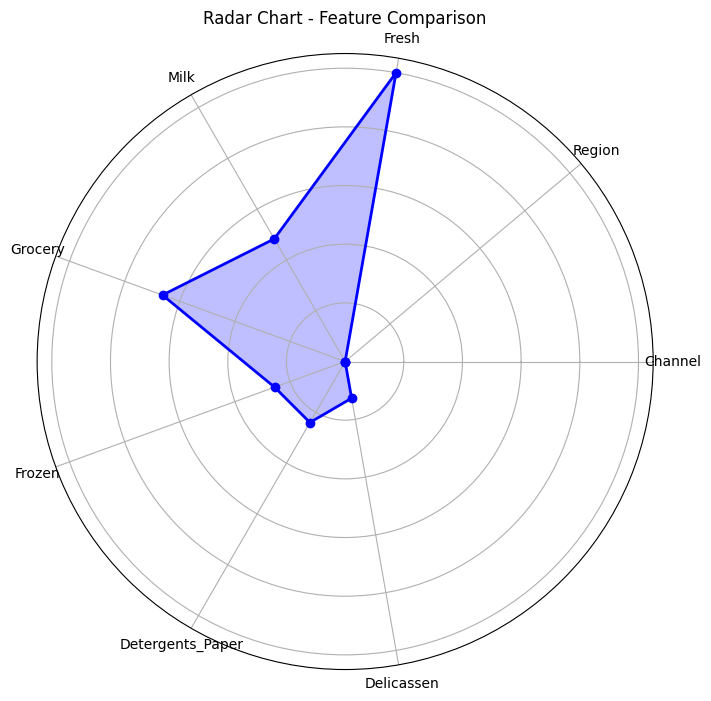

In [29]:
# Select the features for the radar chart
features = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Calculate the mean values for each feature
mean_values = customers[features].mean()

# Calculate the maximum values for each feature
max_values = customers[features].max()

# Normalize the values between 0 and 1
normalized_values = (mean_values - mean_values.min()) / (mean_values.max() - mean_values.min())

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, len(features) + 1, endpoint=False).tolist()
values = np.concatenate((normalized_values.values, [normalized_values.values[0]]))

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.plot(angles, values, color='blue', linewidth=2, marker='o')
ax.fill(angles, values, color='blue', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_yticklabels([])
ax.set_title('Radar Chart - Feature Comparison')

# Show the plot
plt.show()



In [ ]:
# Yaayy, it's so stupid, but I feel happy I read that correctly, and that thanks to Pedro and Aliya I thought of using this. I can't read heatmaps at all...

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

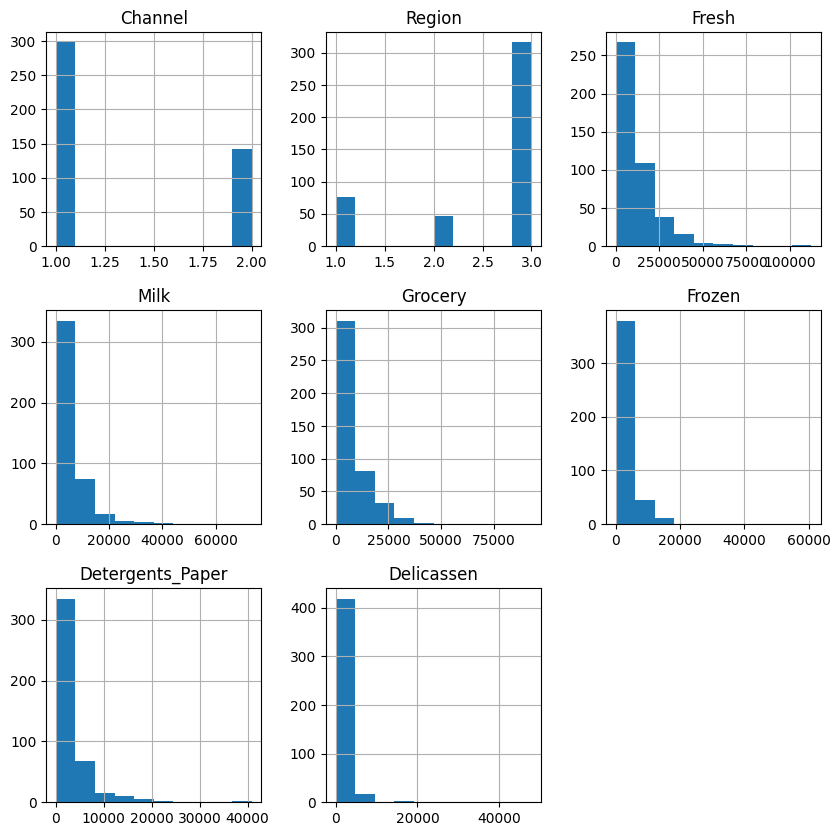

In [40]:
# 6. Data distribution and skewness
customers.hist(figsize=(10, 10))

Text(0.5, 1.0, 'Histogram of Customer Data')

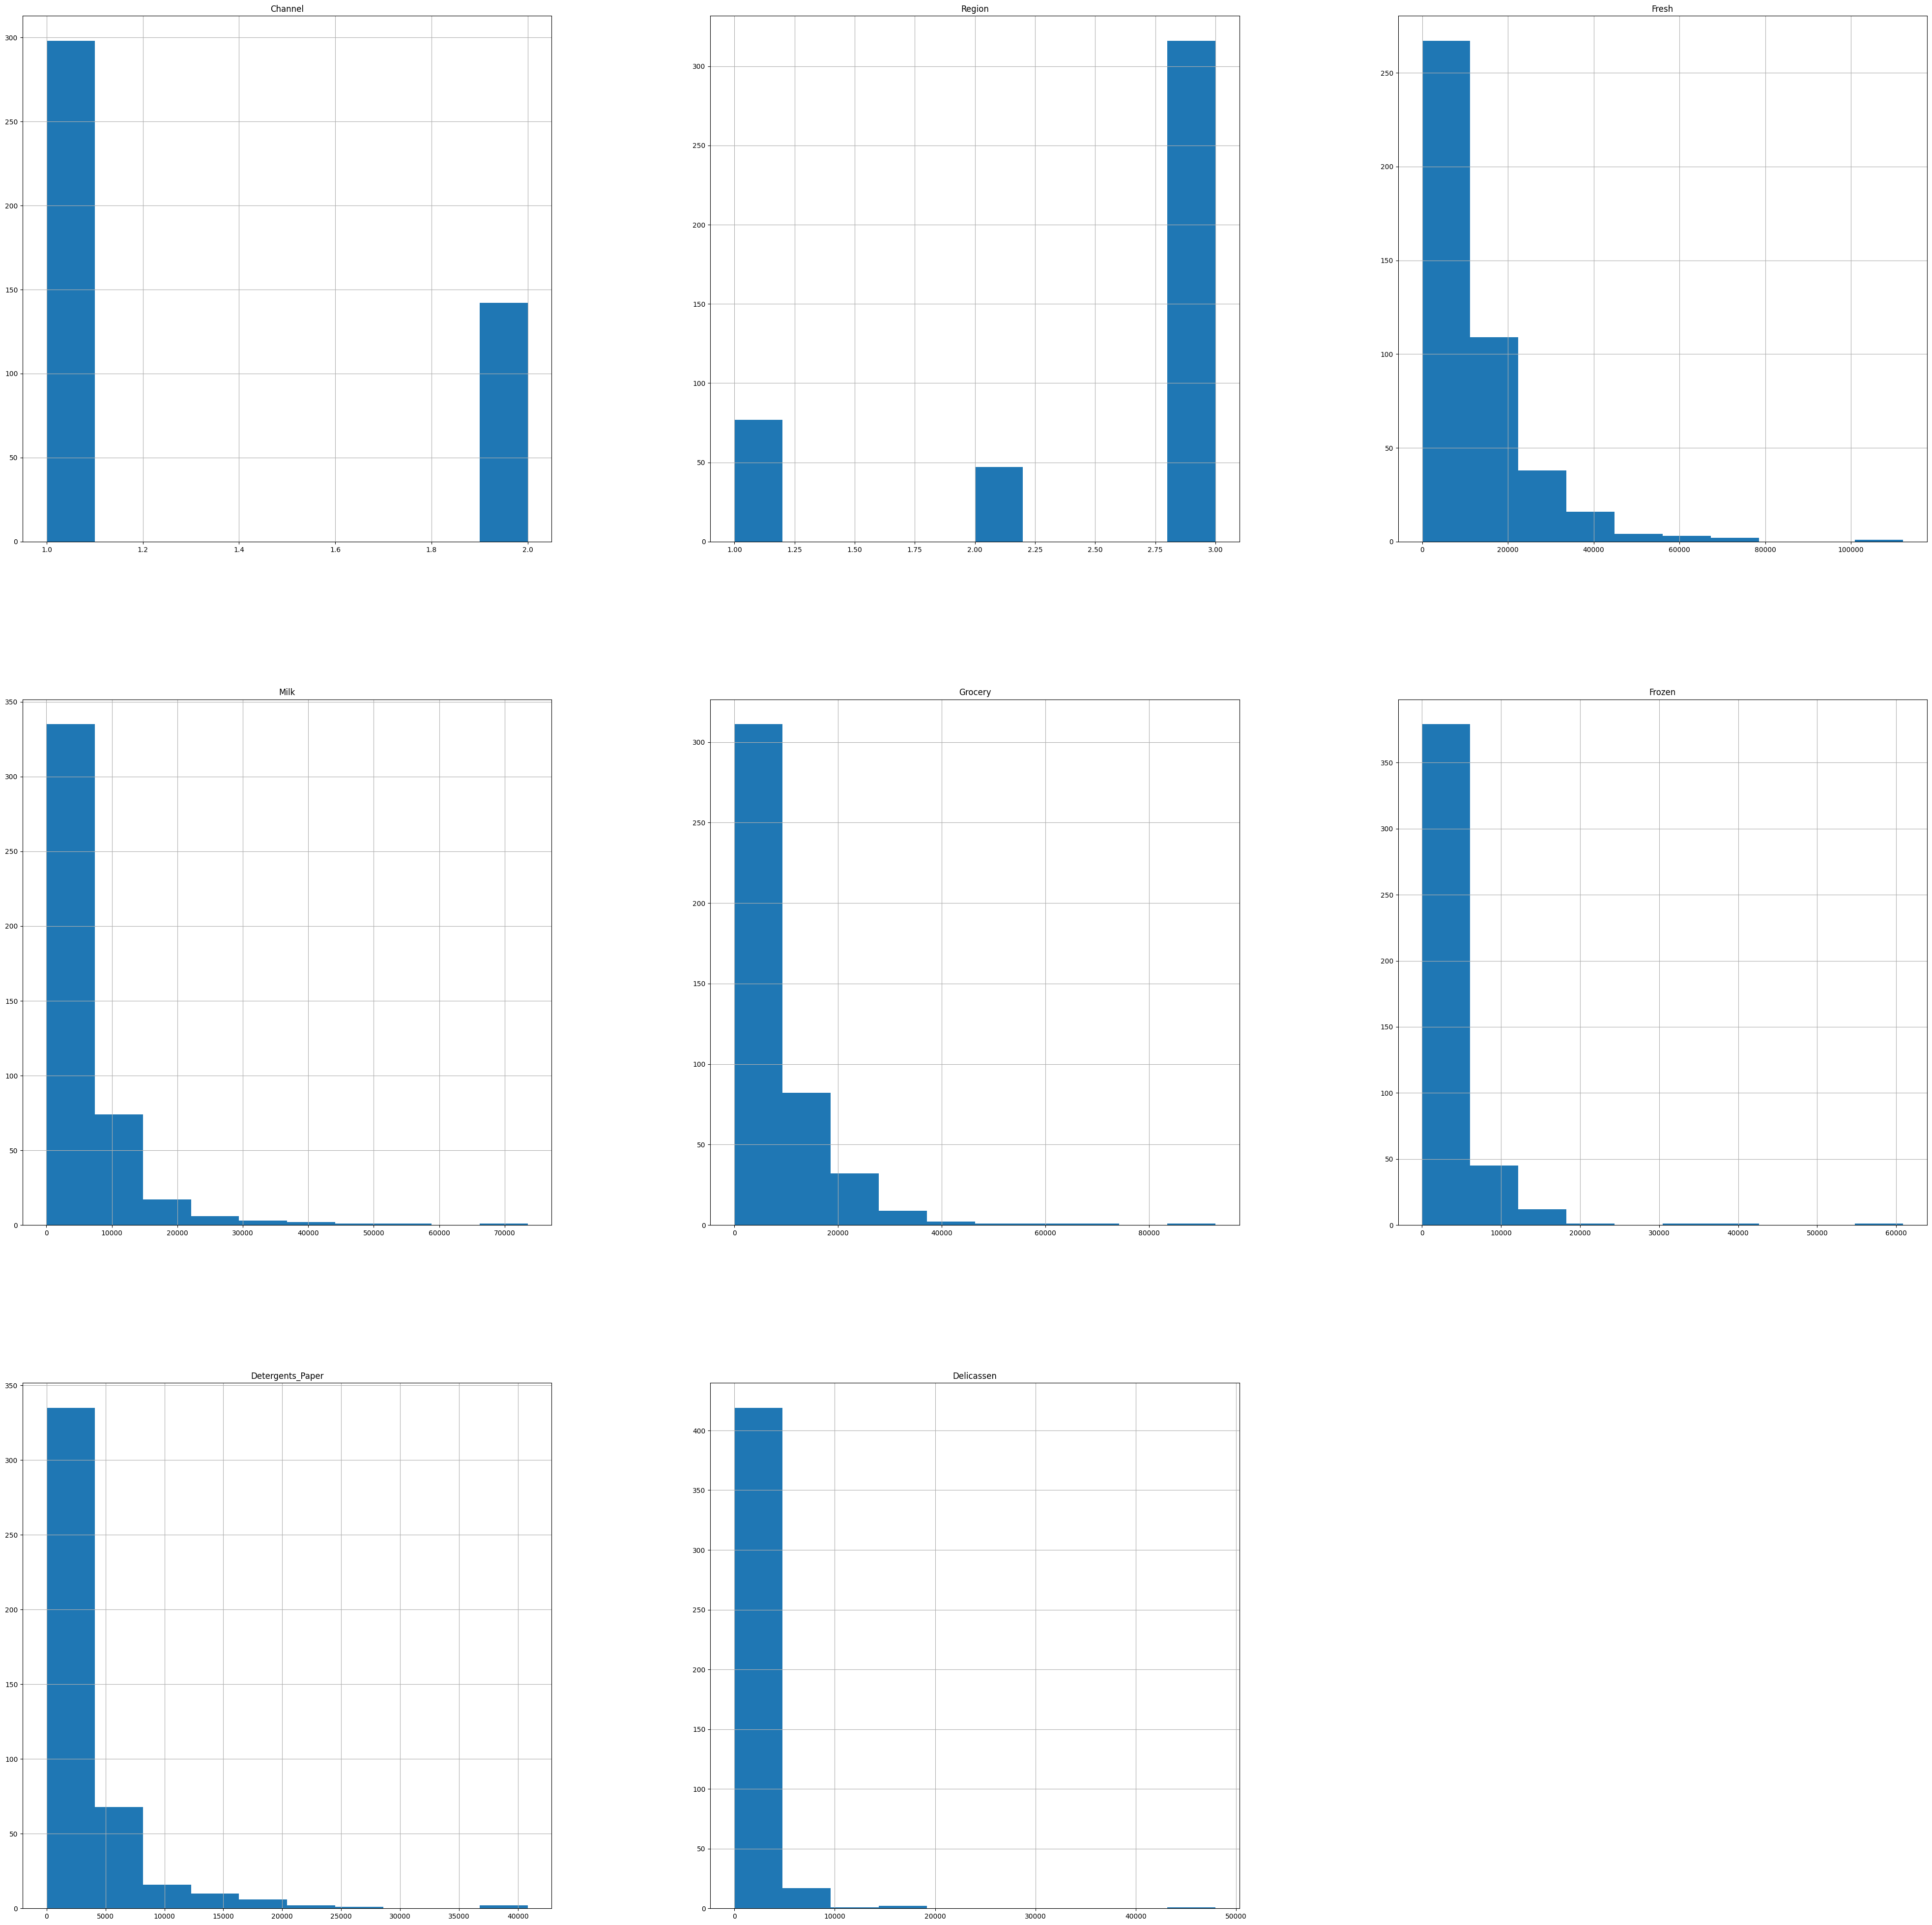

In [41]:
# 6. Data distribution and skewness
customers.hist(figsize=(50, 50))

plt.xlabel("Values", fontsize=4000)
plt.ylabel("Frequency", fontsize=4000)
plt.title("Histogram of Customer Data", fontsize=4000)

# I feel like I messed up with the sizes, but there is an outlier in the second plot with the region, they are not homogenously distributed,
    # Maybe it's because they buy much more in that region because they have more supermarkets nearby, and the others do online shopping,
        # We would have to relate those two features to exttract more conclusions

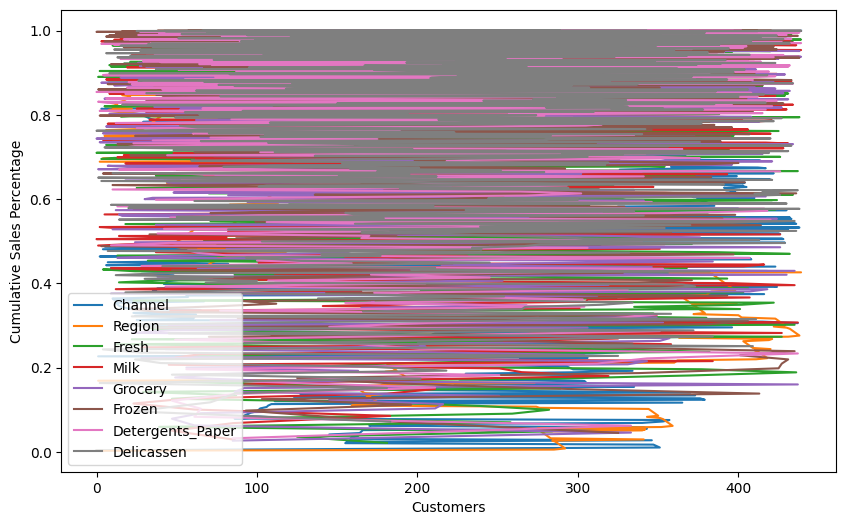

In [45]:
# Define the features
features = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Plot cumulative sales percentage for each feature
plt.figure(figsize=(10, 6))
for feature in features:
    sorted_sales = customers[feature].sort_values(ascending=False)
    cumulative_sales = sorted_sales.cumsum() / sorted_sales.sum()
    plt.plot(cumulative_sales, label=feature)

# Add labels and legend
plt.xlabel('Customers')
plt.ylabel('Cumulative Sales Percentage')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Aham, yeah, it's definitely a very interesting a revealing graph

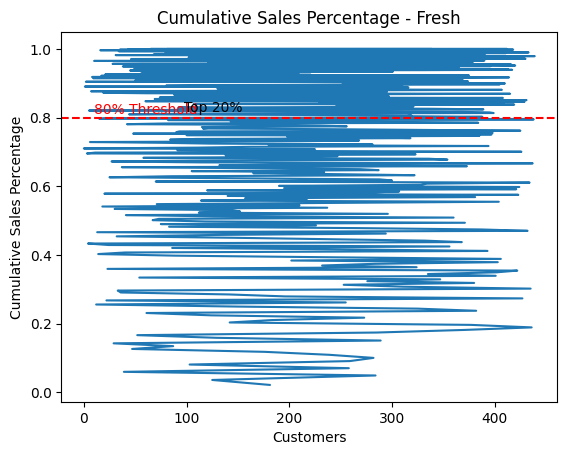

In [46]:
# Select the sales column to analyze
sales_column = 'Fresh'

# Sort the sales column in descending order
sorted_sales = customers[sales_column].sort_values(ascending=False)

# Calculate cumulative sales percentage
cumulative_sales = sorted_sales.cumsum() / sorted_sales.sum()

# Plot cumulative sales percentage
plt.plot(cumulative_sales)
plt.xlabel('Customers')
plt.ylabel('Cumulative Sales Percentage')
plt.title(f'Cumulative Sales Percentage - {sales_column}')

# Determine the top 20% threshold
threshold = 0.2
top_20_percent = int(threshold * len(customers))

# Calculate the cumulative sales percentage for the top 20% customers
top_20_cumulative_sales = cumulative_sales[top_20_percent]

# Add a horizontal line to represent 80% threshold
plt.axhline(y=0.8, color='r', linestyle='--')

# Add text annotation for the 80% threshold
plt.text(10, 0.81, '80% Threshold', color='r')

# Add text annotation for the top 20% cumulative sales percentage
plt.text(top_20_percent + 10, top_20_cumulative_sales - 0.05, 'Top 20%')

# Show the plot
plt.show()



In [ ]:
# So fresh was an outlier because most of the customers were doing their purchases on the top 20%? Let's compare it with Delicassen

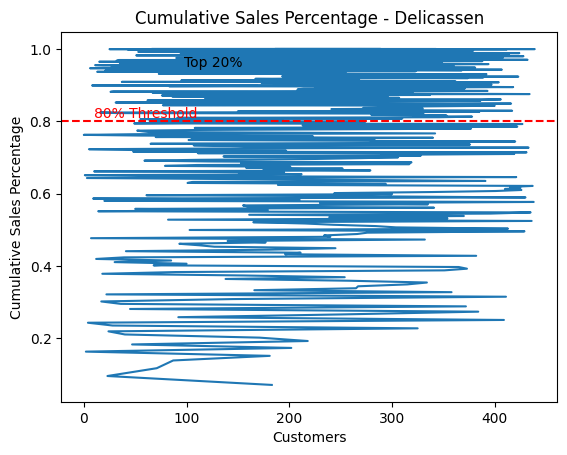

In [47]:
# Select the sales column to analyze
sales_column = 'Delicassen'

# Sort the sales column in descending order
sorted_sales = customers[sales_column].sort_values(ascending=False)

# Calculate cumulative sales percentage
cumulative_sales = sorted_sales.cumsum() / sorted_sales.sum()

# Plot cumulative sales percentage
plt.plot(cumulative_sales)
plt.xlabel('Customers')
plt.ylabel('Cumulative Sales Percentage')
plt.title(f'Cumulative Sales Percentage - {sales_column}')

# Determine the top 20% threshold
threshold = 0.2
top_20_percent = int(threshold * len(customers))

# Calculate the cumulative sales percentage for the top 20% customers
top_20_cumulative_sales = cumulative_sales[top_20_percent]

# Add a horizontal line to represent 80% threshold
plt.axhline(y=0.8, color='r', linestyle='--')

# Add text annotation for the 80% threshold
plt.text(10, 0.81, '80% Threshold', color='r')

# Add text annotation for the top 20% cumulative sales percentage
plt.text(top_20_percent + 10, top_20_cumulative_sales - 0.05, 'Top 20%')

# Show the plot
plt.show()

In [ ]:
# I really thought I had it, but nope, I can see more white fure sure, but it doesn't seem that relevant

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Oh, yeah, yes, definitely it doesn't need to be cleaned, nope, it's pristine, shiny, radiant data.

In [ ]:
# Most of the histograms were distributed in the same way for the same categories of products

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [49]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)
customers_scale


array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [59]:
from sklearn.cluster import KMeans

# Assuming you have the scaled data stored in a variable called 'customers_scale'
# Assuming you have already imported the necessary modules and fitted the scaler

# Create K-Means object
kmeans_model = KMeans(n_clusters=5, random_state=0)

# Fit the K-Means model to the scaled data
kmeans_model.fit(customers_scale)

# Assign the cluster labels back to the customers DataFrame
customers['labels'] = kmeans_model.labels_

print(customers['labels'])





0      1
1      1
2      1
3      0
4      1
      ..
435    0
436    0
437    1
438    0
439    0
Name: labels, Length: 440, dtype: int32


c:\Users\jsctr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jsctr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Count the values in `labels`.

In [60]:
customers.labels.value_counts()


0    210
1    125
2     91
3     12
4      2
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [68]:
from sklearn.cluster import DBSCAN

# Create meanshift object
cluster = DBSCAN(eps=0.5)

# Train model
model = cluster.fit(customers_scale)

# Show cluster membership
customers['labels_DBSCAN'] = model.labels_

print(customers['labels_DBSCAN'])

0     -1
1     -1
2     -1
3      1
4     -1
      ..
435   -1
436   -1
437   -1
438    1
439    1
Name: labels_DBSCAN, Length: 440, dtype: int64


Count the values in `labels_DBSCAN`.

In [67]:
customers.labels_DBSCAN.value_counts()


-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

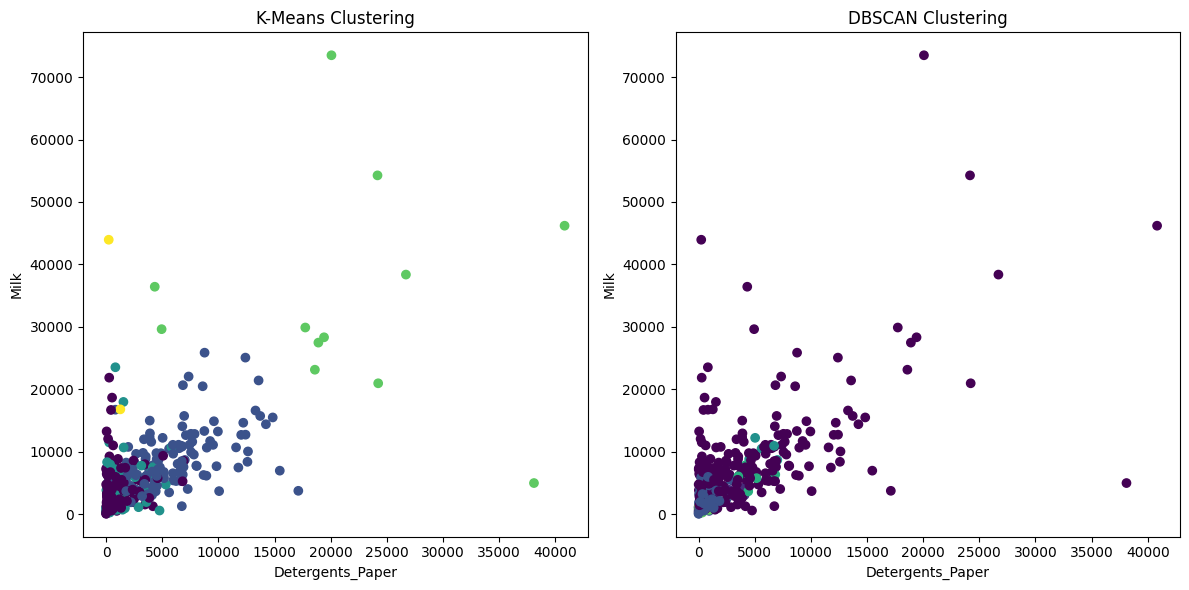

In [86]:
plt.figure(figsize=(12, 6))

# Scatter plot with K-Means clustering labels
plt.subplot(1, 2, 1)
plt.scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels, cmap='viridis')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.title('K-Means Clustering')

# Scatter plot with DBSCAN clustering labels
plt.subplot(1, 2, 2)
plt.scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels_db, cmap='viridis')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.title('DBSCAN Clustering')

plt.show()





Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

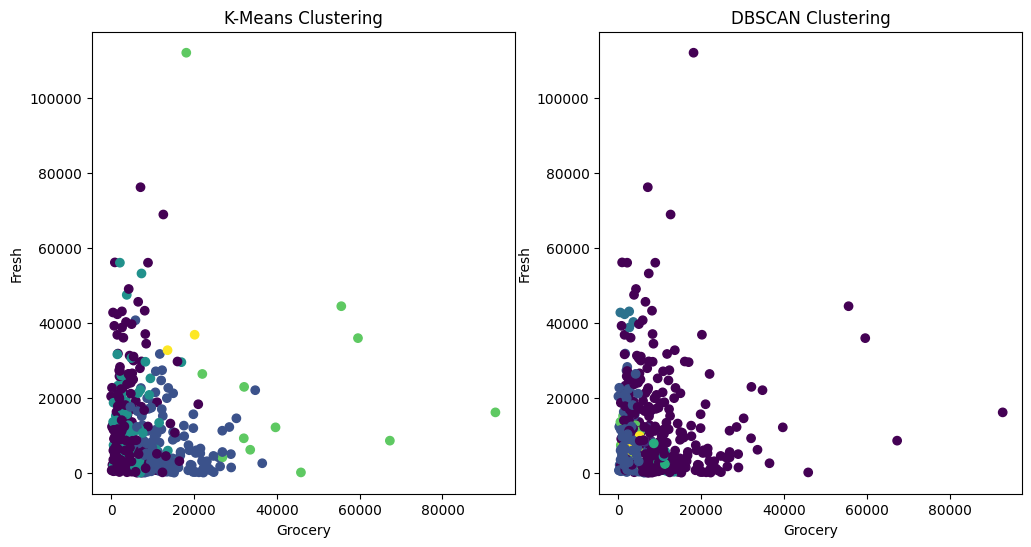

In [89]:
plt.figure(figsize=(12, 6))

# Scatter plot with K-Means clustering labels
plt.subplot(1, 2, 1)
plt.scatter(customers.Grocery, customers.Fresh, c=customers.labels, cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title('K-Means Clustering')


# Scatter plot with DBSCAN clustering labels
plt.subplot(1, 2, 2)
plt.scatter(customers.Grocery, customers.Fresh, c=customers.labels_db, cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title('DBSCAN Clustering')


plt.show()



Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

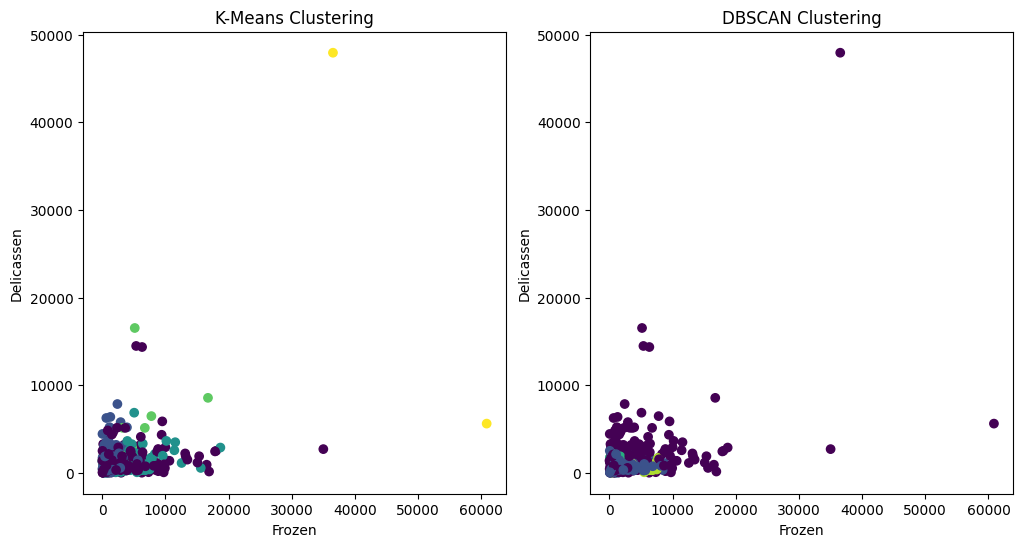

In [90]:
plt.figure(figsize=(12, 6))

# Scatter plot with K-Means clustering labels
plt.subplot(1, 2, 1)
plt.scatter(customers.Frozen, customers.Delicassen, c=customers.labels, cmap='viridis')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.title('K-Means Clustering')


# Scatter plot with DBSCAN clustering labels
plt.subplot(1, 2, 2)
plt.scatter(customers.Frozen, customers.Delicassen, c=customers.labels_db, cmap='viridis')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.title('DBSCAN Clustering')

plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [72]:
kmeans = customers.groupby(by='labels').agg('mean')
dbscan = customers.groupby(by='labels_db').agg('mean')
dbscan


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
labels_db,,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,1.05098,-1.0
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.00000,0.0
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.00000,1.0
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.00000,2.0
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.00000,3.0
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.00000,4.0
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,2.00000,5.0
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,2.00000,6.0
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,2.00000,7.0


Which algorithm appears to perform better?

In [ ]:
# Why is this not a bonus challenge question??? But I'd say K-means because it seems more visible and gives more information with the colours?

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here